In [3]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()

import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

Ultralytics YOLOv8.0.118 🚀 Python-3.11.2 torch-2.1.0.dev20230515 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 343.2/926.4 GB disk)


True
True


In [3]:
# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

In [4]:
import wandb
wandb.init(project="MITFisheryHerring",notes="MIT Fishery robo analytics v1")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aus10powell. Use `wandb login --relogin` to force relogin


In [5]:
# Use the model
results = model.train(data='river_herring.yaml', epochs=3,device='cpu')  # can also try mps

Ultralytics YOLOv8.0.118 🚀 Python-3.11.2 torch-2.1.0.dev20230515 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=river_herring.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opse

In [6]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.118 🚀 Python-3.11.2 torch-2.1.0.dev20230515 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /Users/aus10powell/Downloads/RiverHerring/datasets/MITFisheryHerringV1/valid/labels.cache... 111 images, 0 backgrounds, 0 corrupt: 100%|██████████| 111/111 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]
                   all        111        130      0.985      0.992      0.994      0.736
Speed: 0.4ms preprocess, 132.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val


array([    0.73601])

In [7]:
import cv2
# Open the video file
video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/2018 Fish Sightings/2_2018-04-13_15-14-33.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success: 
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 48.8ms
Speed: 1.0ms preprocess, 48.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 52.6ms
Speed: 12.2ms preprocess, 52.6ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 42.6ms
Speed: 0.8ms preprocess, 42.6ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 46.9ms
Speed: 0.8ms preprocess, 46.9ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 45.2ms
Speed: 0.9ms preprocess, 45.2ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 50.1ms
Speed: 1.0ms preprocess, 50.1ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 44.5ms
Speed: 0.8ms preprocess, 44.5ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 46.8ms
Speed: 0.7ms preprocess, 46.8ms 

### Export Model

In [ ]:
# Export the model
# model.export(format='saved_model')

### Load Model

In [16]:
model_best = YOLO('/Users/aus10powell/Downloads/RiverHerring/runs/detect/train38/weights/best.pt')
results = model_best('/Users/aus10powell/Downloads/RiverHerring/datasets/MITFisheryHerringV1/train/images/1_2016-04-21_21-50-1803849_jpg.rf.9a0b6a1cce3c24fe9f44e43b9f355d93.jpg')


image 1/1 /Users/aus10powell/Downloads/RiverHerring/datasets/MITFisheryHerringV1/train/images/1_2016-04-21_21-50-1803849_jpg.rf.9a0b6a1cce3c24fe9f44e43b9f355d93.jpg: 480x640 1 river_herring, 48.3ms
Speed: 1.4ms preprocess, 48.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


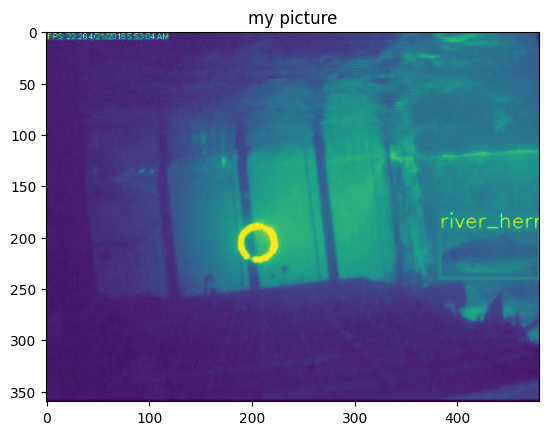

In [20]:
import matplotlib.pyplot as plt
import cv2
annotated_frame = results[0].plot()


gray = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()
